# Linear Regression 

## Introduction
Linear Regression is a fundamental machine learning algorithm used for predicting continuous values. It establishes a linear relationship between the **dependent variable (target)** and one or more **independent variables (features)**.

### Formula for Simple Linear Regression:
\[
Y = mX + b
\]
Where:
- **Y** = Target variable (dependent variable)
- **X** = Feature variable (independent variable)
- **m** = Slope (coefficient)
- **b** = Intercept

For **Multiple Linear Regression**, the formula extends to:
\[
Y = b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n
\]

## Steps to Implement Linear Regression
### 1. Importing Necessary Libraries
### 2. Load and Explore Data
### 3. Select Features and Target Variable
### 4. Split Data into Training and Testing Sets
### 5. Standardizing the Data
### 6. Train a Linear Regression Model
### 7. Make Predictions
### 8. Evaluate the Model

- **Linear Regression** is useful for modeling relationships between variables.
- **Feature Importance** helps in understanding key drivers of the target variable.
- **Regularized Regression** (Ridge, Lasso, ElasticNet) improves model robustness.
- **Residual Analysis** helps in validating model assumptions.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
file_path = "200125_LoL_champion_data.csv"
df = pd.read_csv(file_path)

## Select Features and Target Variable

In [4]:
features = ["difficulty", "toughness", "control", "mobility", "utility", "style", "be", "rp"]
target = "damage"


In [5]:
df_clean = df.dropna(subset=[target])

In [6]:
X = df_clean[features]
y = df_clean[target]

## Split Data into Training and Testing Sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardizing the Data

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train a Linear Regression Model

In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


LinearRegression()

## Make Predictions

In [10]:
y_pred = lr_model.predict(X_test_scaled)

## Evaluate the Model

In [12]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression Results:")
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

Linear Regression Results:
MSE: 0.1923, RMSE: 0.4385, R² Score: 0.5896


In [13]:
coefficients = pd.DataFrame({"Feature": features, "Coefficient": lr_model.coef_})
print("\nFeature Importance:")
print(coefficients)


Feature Importance:
      Feature  Coefficient
0  difficulty     0.114316
1   toughness    -0.283806
2     control    -0.195669
3    mobility    -0.078141
4     utility    -0.274679
5       style    -0.058484
6          be    -0.017701
7          rp     0.032388


## Regularized Regression (Ridge, Lasso, ElasticNet)

In [14]:
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [15]:
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.1)

In [16]:
ridge_pred = ridge_model.predict(X_test_scaled)
lasso_pred = lasso_model.predict(X_test_scaled)
elastic_pred = elastic_model.predict(X_test_scaled)

In [17]:
print("\nRegularized Regression Results:")
print(f"Ridge R²: {r2_score(y_test, ridge_pred):.4f}")
print(f"Lasso R²: {r2_score(y_test, lasso_pred):.4f}")
print(f"ElasticNet R²: {r2_score(y_test, elastic_pred):.4f}")


Regularized Regression Results:
Ridge R²: 0.5904
Lasso R²: 0.5306
ElasticNet R²: 0.5888


## Residual Analysis (Model Validation)

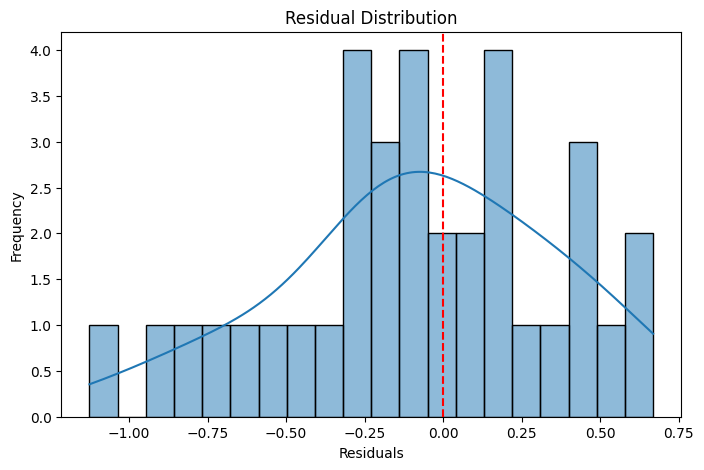

In [18]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()